In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# Import Packages

In [2]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Read Dataset

In [3]:
train_df=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test_df=pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

## print shape of dataset with rows and columns
print(train_df.shape,test_df.shape)

(2000, 21) (1000, 21)


In [4]:
## print the top5 records
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [8]:
# Verifying data types and integrity
print("\nData Types:")
print(train_df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(train_df.describe())


Data Types:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Descriptive Statistics:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.00

In [9]:
dataset=train_df

# EDA
## Missing features

In [10]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

No Missing Feature

## Numerical Variables

In [11]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  21


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Temporal Variables(Eg: Datetime Variables)

In [13]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

## Numerical variables are usually of 2 type
## 1. Discrete Features and Continous Features

In [14]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [15]:
discrete_feature

['blue',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


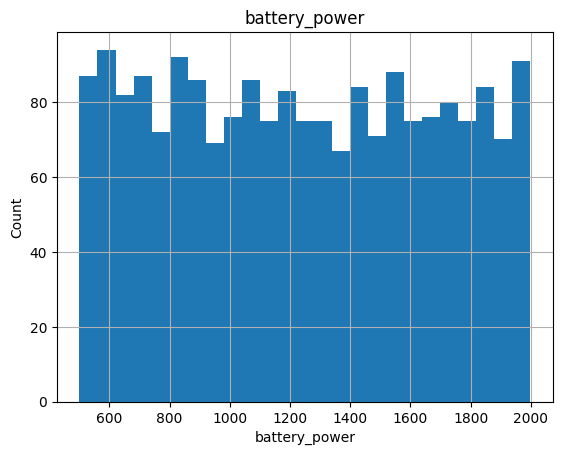

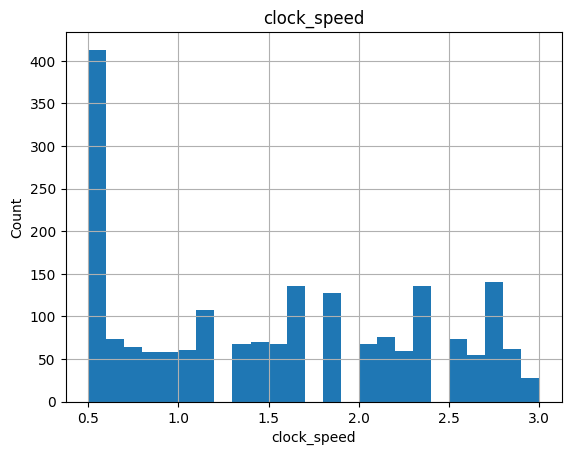

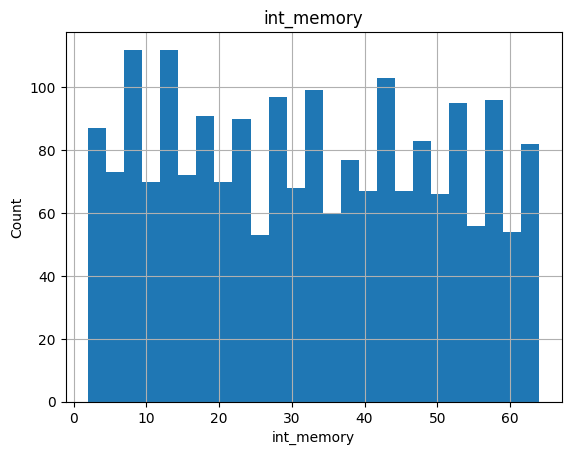

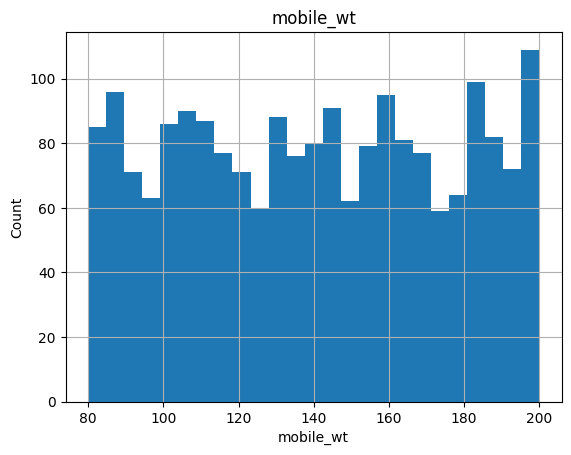

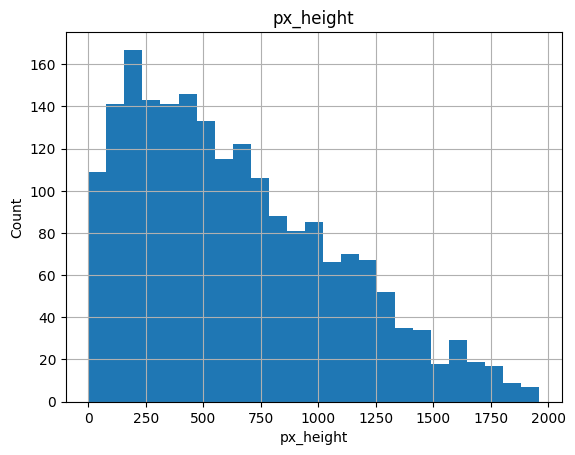

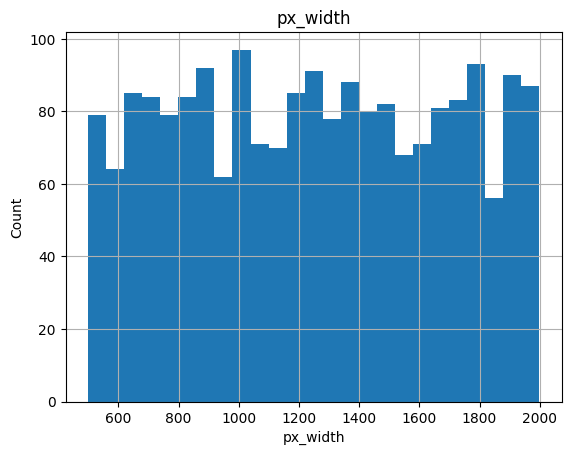

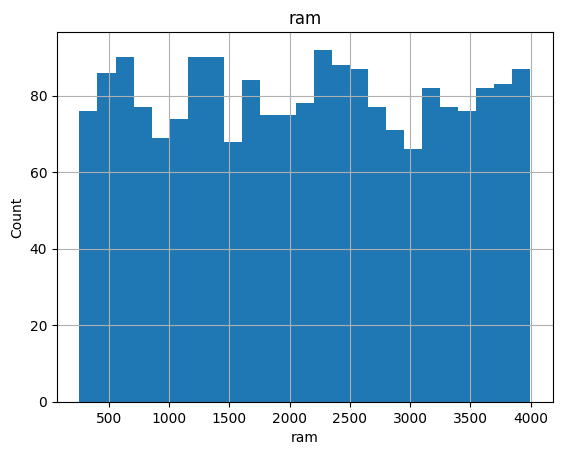

In [17]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers In Numerical Feature

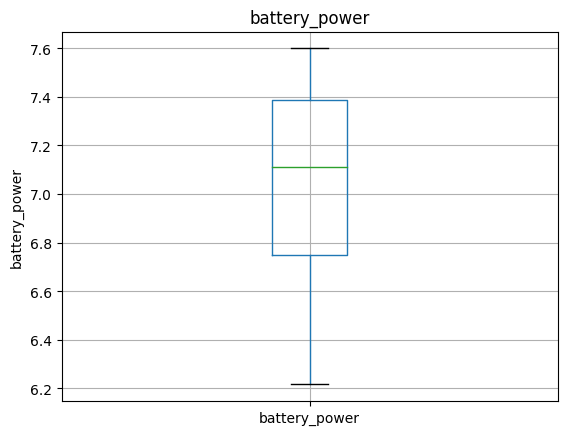

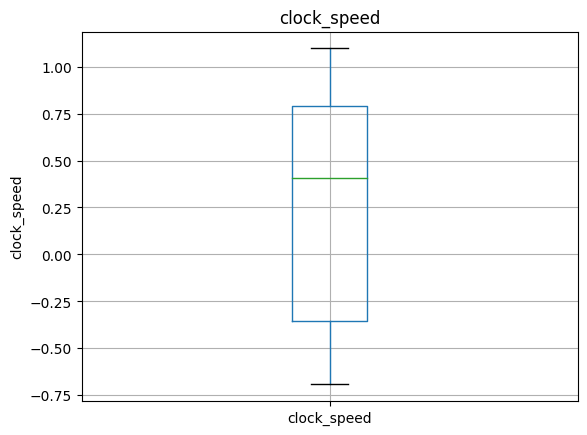

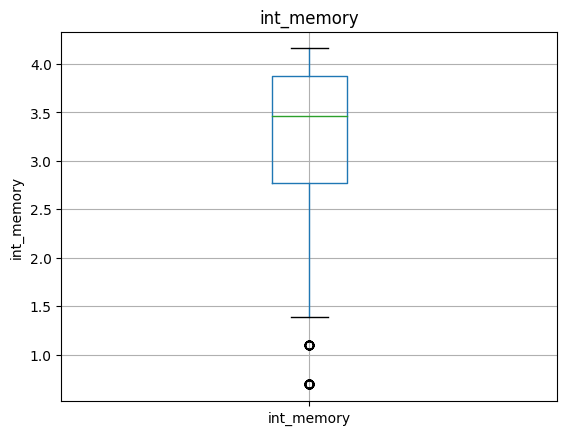

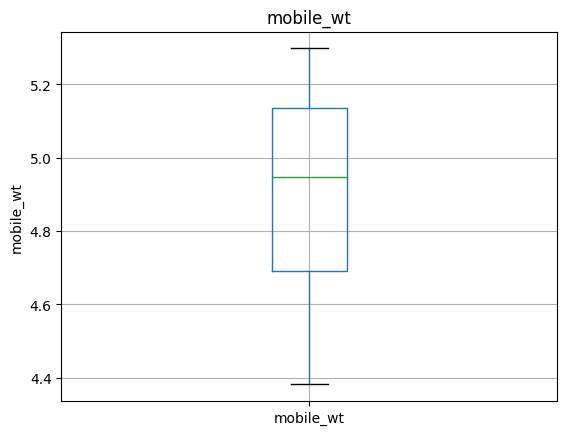

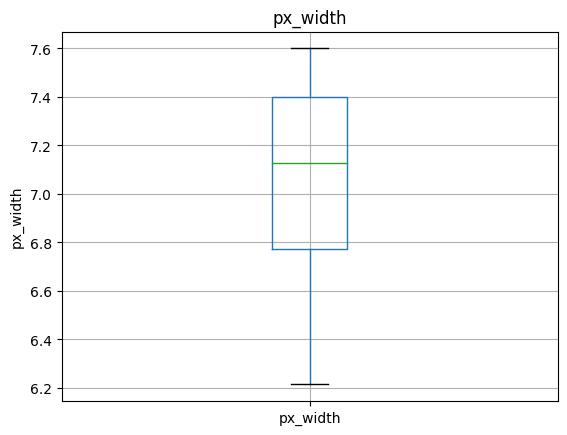

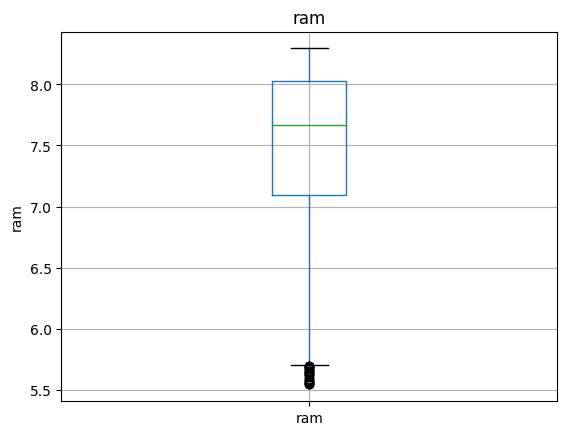

In [18]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

# Feature Slection

In [19]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [20]:
## Capture the dependent feature
X=dataset.drop(['price_range'],axis=1)
y=dataset[['price_range']]

In [21]:
X.shape,y.shape

((2000, 20), (2000, 1))

In [22]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [23]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True])

In [24]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 20
selected features: 14
features with coefficients shrank to zero: 6


In [25]:
selected_feat

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'talk_time', 'wifi'],
      dtype='object')

In [26]:
X=X[selected_feat]

In [27]:
X.head()

,battery_power,clock_speed,dual_sim,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,wifi
0,842,2.2,0,1,7,188,2,2,20,756,2549,9,19,1
1,1021,0.5,1,0,53,136,3,6,905,1988,2631,17,7,0
2,563,0.5,1,2,41,145,5,6,1263,1716,2603,11,9,0
3,615,2.5,0,0,10,131,6,9,1216,1786,2769,16,11,0
4,1821,1.2,0,13,44,141,2,14,1208,1212,1411,8,15,0


<Axes: >

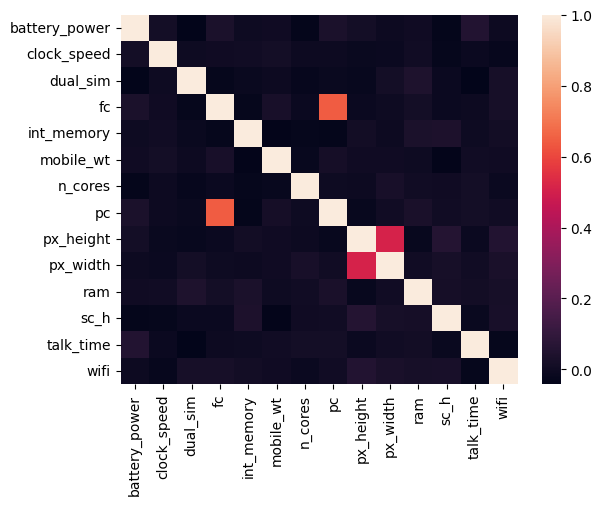

In [28]:
sns.heatmap(X.corr())

In [29]:
X.head()

,battery_power,clock_speed,dual_sim,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,wifi
0,842,2.2,0,1,7,188,2,2,20,756,2549,9,19,1
1,1021,0.5,1,0,53,136,3,6,905,1988,2631,17,7,0
2,563,0.5,1,2,41,145,5,6,1263,1716,2603,11,9,0
3,615,2.5,0,0,10,131,6,9,1216,1786,2769,16,11,0
4,1821,1.2,0,13,44,141,2,14,1208,1212,1411,8,15,0


# Model Building

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

/tmp/ipykernel_18/324425438.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [32]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [33]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.8816666666666667


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,
                             precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score)

In [35]:
models={
    "Decison Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":xgb.XGBClassifier(objective="binary:logistic", random_state=42),
    "GradientBoost":GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "AdaBoost":AdaBoostClassifier(n_estimators=100, random_state=0),
    "CatBoost":CatBoostClassifier(learning_rate= 0.1, depth=6, l2_leaf_reg= 3, iterations= 100)
    
}

In [36]:
!pip install dagshub
!pip install mlflow

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 3.1 MB/s eta 0:00:00
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10487 sha256=ae8646c382748d77f6924d9f4c84f7b5cf37db8a36767619a694db5332f1fb5f
  Stored in directory: /root/.cache/pip/wheels/c0/18/f6/f0d6be9d0435e2677ce5cc758e91da50053dce4

In [37]:
import dagshub
dagshub.init(repo_owner='SunilKumar-ugra', repo_name='MobilePriceClassification', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=89991fa1-97f2-4e1a-ad3a-b511da953c8d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=ffa2d012403e67f23982567445b5fa63591121eb68f39e99b3e4df3e843f74a8




Initialized MLflow to track repo "SunilKumar-ugra/MobilePriceClassification"

Repository SunilKumar-ugra/MobilePriceClassification initialized!

In [38]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/SunilKumar-ugra/MobilePriceClassification.mlflow")
mlflow.set_experiment("Mobile Price Classification")

<Experiment: artifact_location='mlflow-artifacts:/b6fa06694042413aa035c5fbeb8abccc', creation_time=1716895721420, experiment_id='0', last_update_time=1716895721420, lifecycle_stage='active', name='Mobile Price Classification', tags={'mlflow.sharedViewState.f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca': '{"searchFilter":"","orderByKey":"metrics.`Test '
                                                                                            'Accuracy`","orderByAsc":false,"startTime":"ALL","lifecycleFilter":"Active","datasetsFilter":[],"modelVersionFilter":"All '
                                                                                            'Runs","selectedColumns":["attributes.`Source`","attributes.`Models`","metrics.`Train '
                                                                                            'Accuracy`","metrics.`Test '
                                                                                            'Accuracy`"],"run

In [39]:
def classification_performace_matric(actual, pred,avg):
        acc=accuracy_score(actual,pred)
        f1=f1_score(actual,pred,average=avg)
        precission=precision_score(actual,pred,average=avg)
        recall=recall_score(actual,pred,average=avg)
        return acc,f1,precission,recall

In [40]:
mlflow.sklearn.autolog(disable=True)

for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    
    with mlflow.start_run(run_name=str(model_name)):
        mlflow.set_tag("model_name", str(model_name))
        
        model.fit(X_train,y_train)
    
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)
        
        
        #training   performance
        (trn_acc,trn_f1,trn_precission,trn_recall)=classification_performace_matric(y_train,y_train_pred,'weighted')
        
        #testing   performance
        (tst_acc,tst_f1,tst_precission,tst_recall)=classification_performace_matric(y_test,y_test_pred,'weighted')
        
        
        
        #train performance log
        
        mlflow.log_metric("Train Accuracy", trn_acc)
        mlflow.log_metric("Train F1 Score",trn_f1)
        mlflow.log_metric("Train Precision",trn_precission)
        mlflow.log_metric("Train Recall",trn_recall)
        
        # test performance log
        
        mlflow.log_metric("Test Accuracy", tst_acc)
        mlflow.log_metric("Test F1 Score",tst_f1)
        mlflow.log_metric("Test Precision",tst_precission)
        mlflow.log_metric("Test Recall",tst_recall)
        
        #Model log
        mlflow.sklearn.log_model(model, str(model_name)+"_model")

/tmp/ipykernel_18/3687507582.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before S

0:	learn: 1.2658698	total: 66.1ms	remaining: 6.54s
1:	learn: 1.1748159	total: 70.9ms	remaining: 3.47s
2:	learn: 1.0917748	total: 75.2ms	remaining: 2.43s
3:	learn: 1.0027333	total: 79.9ms	remaining: 1.92s
4:	learn: 0.9293613	total: 84.3ms	remaining: 1.6s
5:	learn: 0.8618800	total: 88.7ms	remaining: 1.39s
6:	learn: 0.8149778	total: 93ms	remaining: 1.23s
7:	learn: 0.7598498	total: 98.2ms	remaining: 1.13s
8:	learn: 0.7241426	total: 102ms	remaining: 1.04s
9:	learn: 0.6864946	total: 107ms	remaining: 961ms
10:	learn: 0.6595928	total: 111ms	remaining: 896ms
11:	learn: 0.6291023	total: 115ms	remaining: 844ms
12:	learn: 0.5992185	total: 119ms	remaining: 798ms
13:	learn: 0.5741525	total: 124ms	remaining: 761ms
14:	learn: 0.5479644	total: 128ms	remaining: 728ms
15:	learn: 0.5275537	total: 133ms	remaining: 698ms
16:	learn: 0.5165253	total: 137ms	remaining: 670ms
17:	learn: 0.4995629	total: 141ms	remaining: 644ms
18:	learn: 0.4874420	total: 145ms	remaining: 620ms
19:	learn: 0.4692618	total: 149ms	re

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Result

[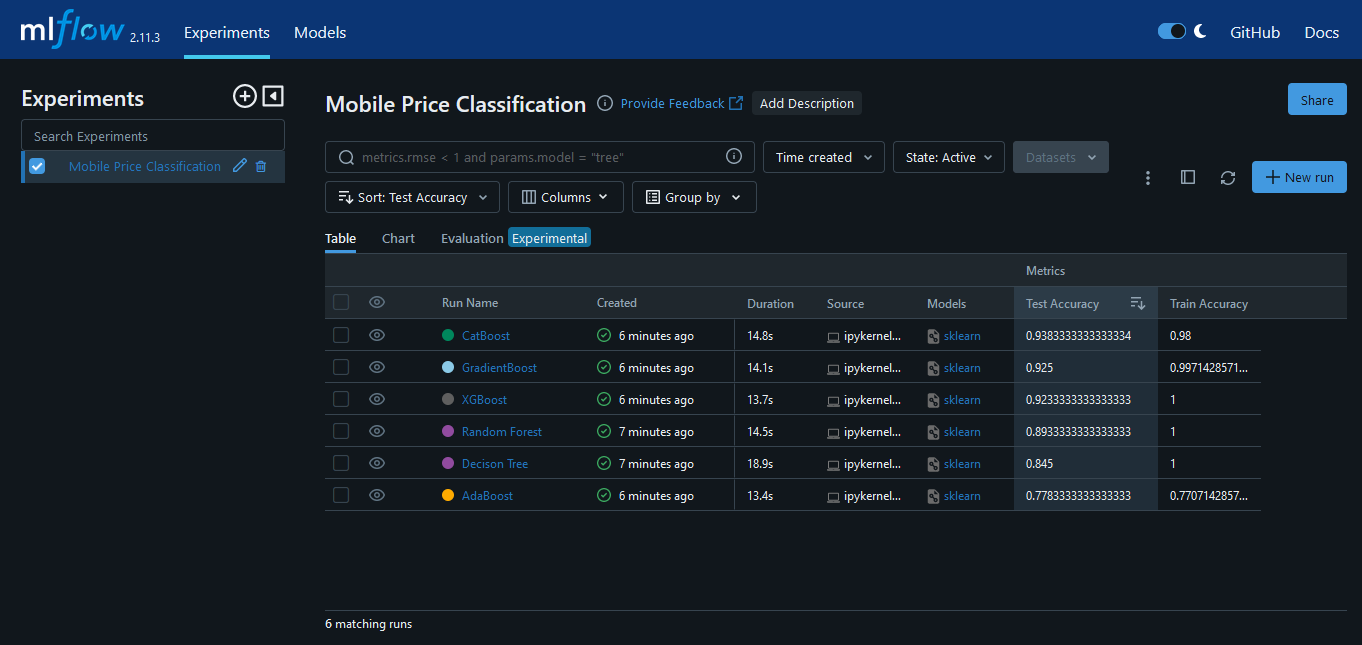](https://dagshub.com/SunilKumar-ugra/MobilePriceClassification.mlflow/#/experiments/0?viewStateShareKey=f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca)